### this tries touse classifier from 190718 data set on new data

In [58]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from scipy import stats

In [2]:
'''firsr thing will be to develop rndm tree classifier'''


'''chane to the directory with the training data'''
os.chdir(r'C:\Users\LegantLab\Documents\git\tad\Legant_lab\200428_adipogenesis_timecourses_revisited\190718_3t3l1_time_course_r5\annotated_csvs')
df_train_orig = pd.read_csv('annotated_compiled_data.csv')
keep_cats = [ 'AreaShape_Area',
 #'AreaShape_Center_X',
 #'AreaShape_Center_Y',
 #'AreaShape_Center_Z',
 'AreaShape_Compactness',
 'AreaShape_Eccentricity',
 'AreaShape_EulerNumber',
 'AreaShape_Extent',
 'AreaShape_FormFactor',
 'AreaShape_MajorAxisLength',
 'AreaShape_MaxFeretDiameter',
 'AreaShape_MaximumRadius',
 'AreaShape_MeanRadius',
 'AreaShape_MedianRadius',
 'AreaShape_MinFeretDiameter',
 'AreaShape_MinorAxisLength',
 'AreaShape_Orientation',
 'AreaShape_Perimeter',
 'AreaShape_Solidity',
 'AreaShape_Zernike_0_0',
 'AreaShape_Zernike_1_1',
 'AreaShape_Zernike_2_0',
 'AreaShape_Zernike_2_2',
 'AreaShape_Zernike_3_1',
 'AreaShape_Zernike_3_3',
 'AreaShape_Zernike_4_0',
 'AreaShape_Zernike_4_2',
 'AreaShape_Zernike_4_4',
 'AreaShape_Zernike_5_1',
 'AreaShape_Zernike_5_3',
 'AreaShape_Zernike_5_5',
 'AreaShape_Zernike_6_0',
 'AreaShape_Zernike_6_2',
 'AreaShape_Zernike_6_4',
 'AreaShape_Zernike_6_6',
 'AreaShape_Zernike_7_1',
 'AreaShape_Zernike_7_3',
 'AreaShape_Zernike_7_5',
 'AreaShape_Zernike_7_7',
 'AreaShape_Zernike_8_0',
 'AreaShape_Zernike_8_2',
 'AreaShape_Zernike_8_4',
 'AreaShape_Zernike_8_6',
 'AreaShape_Zernike_8_8',
 'AreaShape_Zernike_9_1',
 'AreaShape_Zernike_9_3',
 'AreaShape_Zernike_9_5',
 'AreaShape_Zernike_9_7',
 'AreaShape_Zernike_9_9',
 'Intensity_IntegratedIntensityEdge_dapi',
 'Intensity_IntegratedIntensity_dapi',
 'Intensity_LowerQuartileIntensity_dapi',
 'Intensity_MADIntensity_dapi',
 'Intensity_MassDisplacement_dapi',
 'Intensity_MaxIntensityEdge_dapi',
 'Intensity_MaxIntensity_dapi',
 'Intensity_MeanIntensityEdge_dapi',
 'Intensity_MeanIntensity_dapi',
 'Intensity_MedianIntensity_dapi',
 'Intensity_MinIntensityEdge_dapi',
 'Intensity_MinIntensity_dapi',
 'Intensity_StdIntensityEdge_dapi',
 'Intensity_StdIntensity_dapi',
 'Intensity_UpperQuartileIntensity_dapi',
'in_object']




'''read in the training data and drop categories and entries that are of no use'''
df_train = df_train_orig[keep_cats] # make a copy of original df. I am going to alter this a little bit in order to pull out train and test cats
df_train = df_train.dropna()

'''this is target category for the training the classifier'''
target_cat_name = 'in_object'

'''remove unwanted categories'''
#unwanted_cat = ['Unnamed: 0']#, 'ImageNumber', 'ObjectNumber']
#df_train.drop(unwanted_cat, axis = 1, inplace = True)

'''define train and target data'''
x_train = df_train.drop('in_object', axis = 1)
y_train = df_train[target_cat_name]

#x_test = df_
#y_test = df_whole.[target_cat_name]

#'''split data into train and test sets'''
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 42)

'''this is a feature scaling step. This will standardize all of the data in order to pull everything into the same range'''
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
#x_test = sc_X.transform(x_test)

'''random forest classifier'''
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

['df_in_stad3-52-xy3c1.csv',
 'df_in_stad3-55-xy6c1.csv',
 'df_out_stad3-52-xy3c1.csv',
 'df_out_stad3-55-xy6c1.csv']

accuracy:  0.796875  precision:  0.8571428571428571


array([[21,  5],
       [ 8, 30]], dtype=int64)

### I think that this is working well enough that I can move on from here

In [29]:
os.chdir(r'C:\Users\LegantLab\Documents\git\tad\Legant_lab\200428_adipogenesis_timecourses_revisited\190720_3t3l1_time_course_r6\p300_h3k4me3_set')
df_orig_ = pd.read_csv('MyExpt_wholenuclei.csv')

In [30]:
df_orig = df_orig_.dropna()
len(df_orig) / len(df_orig_)

0.863961813842482

In [31]:
x_test = df_orig[keep_cats[:-1]]
#x_test = df_test.drop('in_object', axis = 1)
x_test = sc_X.transform(x_test)

'''make predictions based on the trained data'''
y_pred = clf.predict(x_test)
'''double check accuracy and precisiton of model'''
df_orig['pred'] = y_pred

C:\Users\LegantLab\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
df_parsed = df_orig.loc[df_orig.pred == 1]

In [33]:
len(df_parsed) / len(df_orig)

0.4185082872928177

In [34]:
np.max(df_parsed.ImageNumber)

63

In [11]:
lower_ranges = list(range(1, 65, 9))[:-1]
upper_ranges = list(range(1, 65, 9))[1:]
times_lst = [ -2, -1, .083, .167, .25, .33, 1]

df_running_lst = []
for i in range(len(lower_ranges)):
    print('l: ', lower_ranges[i], ' u: ', upper_ranges[i], ' t: ', times_lst[i])

l:  1  u:  10  t:  -2
l:  10  u:  19  t:  -1
l:  19  u:  28  t:  0.083
l:  28  u:  37  t:  0.167
l:  37  u:  46  t:  0.25
l:  46  u:  55  t:  0.33
l:  55  u:  64  t:  1


In [78]:
lower_ranges = list(range(1, 65, 9))[:-1]
upper_ranges = list(range(1, 65, 9))[1:]
times_lst = [ -2, -1, .083, .167, 0, .33, 1]

df_running_lst = []
for i in range(len(lower_ranges)):
    df_ = df_orig.loc[(df_orig.ImageNumber >= lower_ranges[i])]
    df_ = df_.loc[df_.ImageNumber < upper_ranges[i]]
    #print('l: ', lower_ranges[i], ' u: ', upper_ranges[i])
    df_['day'] = np.zeros(len(df_))
    df_['day'] += times_lst[i]
    df_running_lst.append(df_)
df_orig_p_times = pd.concat(df_running_lst)

In [36]:
for i in np.unique(df_orig_p_times.day):
    df_ = df_orig_p_times.loc[df_orig_p_times.day == i]
    print(len(np.unique(df_.ImageNumber)))

9
9
9
9
9
9
9


In [79]:
lower_ranges = list(range(1, 65, 9))[:-1]
upper_ranges = list(range(1, 65, 9))[1:]
times_lst = [ -2, -1, .083, .167, 0, .33, 1]

df_running_lst = []
for i in range(len(lower_ranges)):
    df_ = df_parsed.loc[(df_parsed.ImageNumber >= lower_ranges[i])]
    df_ = df_.loc[df_.ImageNumber < upper_ranges[i]]
    #print('l: ', lower_ranges[i], ' u: ', upper_ranges[i])
    df_['day'] = np.zeros(len(df_))
    df_['day'] += times_lst[i]
    df_running_lst.append(df_)
df_parsed_p_times = pd.concat(df_running_lst)

In [80]:
ax = sns.lineplot(df_orig_p_times.day, df_orig_p_times.Intensity_IntegratedIntensity_cebp)
ax = sns.lineplot(df_parsed_p_times.day, df_parsed_p_times.Intensity_IntegratedIntensity_cebp, color = 'r')

In [28]:
np.max(df_parsed_p_times.day)

0.33

In [86]:
df_orig_p_times.to_csv('df_orig_p_timest.csv')
df_parsed_p_times.to_csv('df_parsed_p_times.csv')

In [70]:
df_parsed = df_parsed_p_times.copy()
df_orig = df_orig_p_times.copy()

In [42]:
en_orig = []
en_parsed = []

for i in np.unique(df_parsed.day):
    df_p_ = df_parsed.loc[df_parsed.day == i]
    en_parsed.append(len(df_p_))
    df_o_ = df_orig.loc[df_orig.day == 1]
    en_orig.append(len(df_o_))
    
ens_df = pd.DataFrame({'time' : np.unique(df_parsed.day),
                       'n_orig' : en_orig,
                      'n_parsed' : en_parsed,
                      'portion_kept' : np.divide(en_parsed, en_orig)})

In [43]:
ens_df

,time,n_orig,n_parsed,portion_kept
0,-2.000,207,80,0.386473
1,-1.000,207,84,0.405797
2,0.083,207,114,0.550725
3,0.167,207,81,0.391304
4,0.250,207,44,0.212560
5,0.330,207,98,0.473430
6,1.000,207,105,0.507246


In [81]:
ax = sns.lineplot(df_parsed.day, df_parsed.Intensity_IntegratedIntensity_gr)

In [84]:
ax = sns.lineplot(df_parsed.day, df_parsed.Intensity_IntegratedIntensity_h3k4me1)

In [83]:
ax = sns.stripplot(df_parsed.day, df_parsed.Intensity_IntegratedIntensity_cebp)

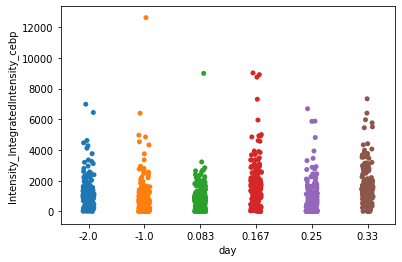

In [24]:
ax = sns.stripplot(df_orig.day, df_orig.Intensity_IntegratedIntensity_cebp)

In [85]:
os.chdir(r'C:\Users\LegantLab\Documents\git\tad\Legant_lab\200428_adipogenesis_timecourses_revisited\190720_3t3l1_time_course_r6\p300_h3k4me3_set')

In [47]:
df_diff = pd.read_csv('df_parsed_p_times.csv')

In [71]:
keep_cats = ['Intensity_IntegratedIntensity_cebp',
             'day']
df_diff_ = df_diff[keep_cats]
df_parsed_ = df_parsed[keep_cats]

df_diff_['old'] = np.ones(len(df_diff_))
df_parsed_['old'] = np.zeros(len(df_parsed_))

df_catted = pd.concat([df_diff_, df_parsed_])

df_catted.day = np.around(df_catted.day, 3)

C:\Users\LegantLab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\LegantLab\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [74]:
ax = sns.stripplot(df_catted.day, df_catted.Intensity_IntegratedIntensity_cebp, hue = df_catted.old, dodge = 1)

In [53]:
%matplotlib qt

In [76]:
df_diff_.day = np.around(df_diff_.day, 3)

C:\Users\LegantLab\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [77]:
name = 'Intensity_IntegratedIntensity_cebp'
for i in np.unique(df_diff_.day):
    df_ = df_diff_.loc[df_diff_.day == i]
    print(i, 'ttest: ', stats.ttest_ind(df_[name], df_parsed.loc[df_parsed.day == i][name]))

-3.0 ttest:  Ttest_indResult(statistic=nan, pvalue=nan)
-2.0 ttest:  Ttest_indResult(statistic=0.7250458396916846, pvalue=0.4693654000486178)
-1.0 ttest:  Ttest_indResult(statistic=3.345734980970333, pvalue=0.0009999075672718757)
0.0 ttest:  Ttest_indResult(statistic=-1.1135836367176488, pvalue=0.26723910904044)
0.083 ttest:  Ttest_indResult(statistic=5.395827262729953, pvalue=2.058399535107697e-07)
0.167 ttest:  Ttest_indResult(statistic=0.18344930914266255, pvalue=0.8546453140213649)
0.25 ttest:  Ttest_indResult(statistic=nan, pvalue=nan)
0.33 ttest:  Ttest_indResult(statistic=4.315425208923639, pvalue=2.4875159683916045e-05)
1.0 ttest:  Ttest_indResult(statistic=0.5457653864592051, pvalue=0.5857427138185993)
6.0 ttest:  Ttest_indResult(statistic=nan, pvalue=nan)


In [69]:
'''add times to the parsed dataframe'''
lower_ranges = list(range(1, 65, 9))[:-1]
upper_ranges = list(range(1, 65, 9))[1:]
times_lst = [ -2, -1, .083, .167, 0, .33, 1]

df_running_lst = []
for i in range(len(lower_ranges)):
    df_ = df_parsed.loc[(df_parsed.ImageNumber >= lower_ranges[i])]
    df_ = df_.loc[df_.ImageNumber < upper_ranges[i]]
    #print('l: ', lower_ranges[i], ' u: ', upper_ranges[i])
    df_['day'] = np.zeros(len(df_))
    df_['day'] += times_lst[i]
    df_running_lst.append(df_)
df_parsed_p_times = pd.concat(df_running_lst)

In [63]:
ax = sns.stripplot(df_parsed_p_times.day, df_parsed_p_times.Intensity_IntegratedIntensity_cebp)

In [87]:
df_parsed.head()

,ImageNumber,ObjectNumber,AreaShape_Area,AreaShape_Center_X,AreaShape_Center_Y,AreaShape_Center_Z,AreaShape_Compactness,AreaShape_Eccentricity,AreaShape_EulerNumber,AreaShape_Extent,...,Location_MaxIntensity_Y_dapi,Location_MaxIntensity_Y_gr,Location_MaxIntensity_Y_h3k4me1,Location_MaxIntensity_Z_cebp,Location_MaxIntensity_Z_dapi,Location_MaxIntensity_Z_gr,Location_MaxIntensity_Z_h3k4me1,Number_Object_Number,pred,day
1,1,2,55610,1363.0,223.0,1.0,1.041011,0.658078,1.0,0.755550,...,292.0,164.0,138.0,0.0,0.0,0.0,0.0,2,1.0,-2.0
2,1,3,86040,198.0,307.0,1.0,1.022447,0.578800,1.0,0.754598,...,265.0,272.0,395.0,0.0,0.0,0.0,0.0,3,1.0,-2.0
3,1,4,37055,1855.0,512.0,1.0,1.172446,0.810396,1.0,0.732095,...,500.0,524.0,473.0,0.0,0.0,0.0,0.0,4,1.0,-2.0
4,1,5,53516,1360.0,719.0,1.0,1.066476,0.682524,1.0,0.756806,...,767.0,658.0,809.0,0.0,0.0,0.0,0.0,5,1.0,-2.0
5,1,6,48873,1168.0,948.0,1.0,1.028447,0.608367,1.0,0.731719,...,945.0,1042.0,966.0,0.0,0.0,0.0,0.0,6,1.0,-2.0
